In [1]:
import numpy as np 
import random
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from time import time
from packing import Individual, Population, Circle, Rect

import pickle

random.seed(0)
np.random.seed(0)

In [2]:
def load_data(filename):
    path = Path("../data") / str("r" + filename + ".csv")
    data = pd.read_csv(path, header=None)
    data.columns = ["width", "height", "value"]
    return data

In [3]:
r800 = load_data("800")
r800

,width,height,value
0,250,120,100
1,320,160,500
2,250,160,600
3,150,120,40
4,400,30,400


## definition of an individual

an one individual is a set of rectangles that are properly fit inside a circle of given radius. These rectangles should not overlap and should be fully contained in the circle

False
False
109


<Axes: title={'center': 'Score: 109'}>

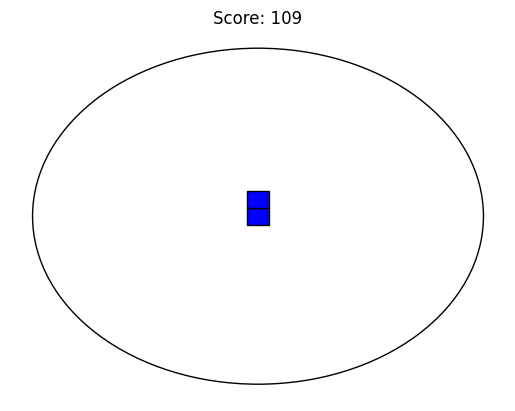

In [4]:
individual = Individual([Rect(0,0, 1,1, 100), Rect(0, 1, 1, 1, 9)], 10)

print(individual.is_collision())
print(individual.is_any_outside_circle())
print(individual.score())

individual.plot()

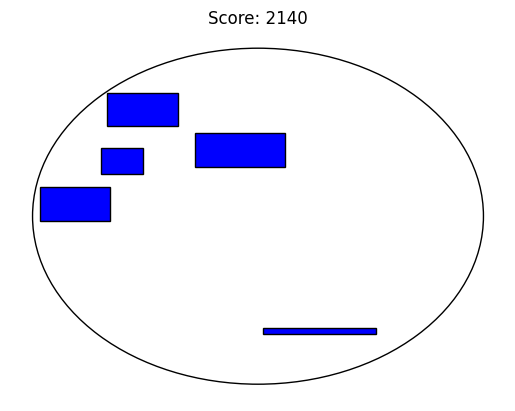

In [5]:
individual = Individual([], 800)

df = load_data("800")

for _ in range(5):
    rect = individual.generate_rect_from_data(df)
    
ax = individual.plot()

plt.show()

<Axes: title={'center': 'Score: 13460'}>

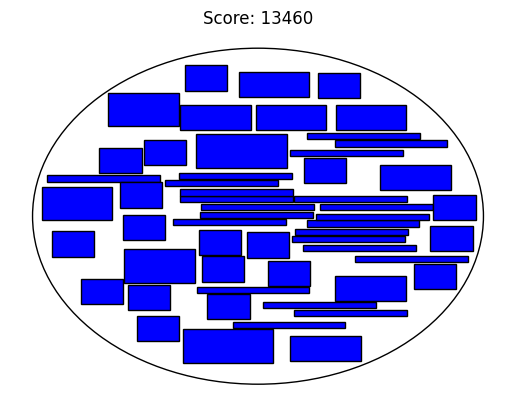

In [122]:
individual.mutate("move", magnitude_move=1, how_many_move=0.3, collide_strategy="remove")
individual.mutate("add", rect_data=df)
individual.plot()


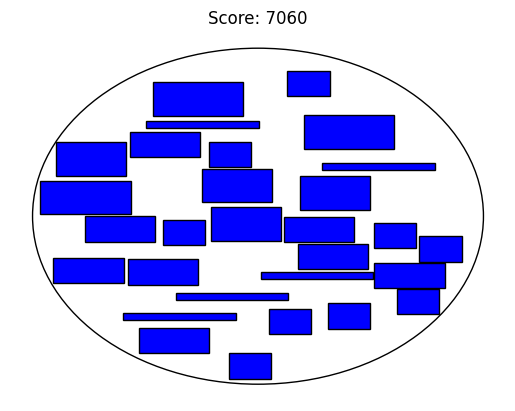

In [7]:
individual1 = Individual([], 800)
individual2 = Individual([], 800)

new_individual1 = Individual([], 800)
new_individual2 = Individual([], 800)

for _ in range(20):
    rect = individual1.generate_rect_from_data(df)
    rect = individual2.generate_rect_from_data(df)
    
new_individual1, new_individual2 = Individual.crossover(individual1, individual2, axis="x", add_new_rects=True, rect_data=df)
new_individual2.plot()
plt.show()

### population testing

<Axes: title={'center': 'Score: 11620'}>

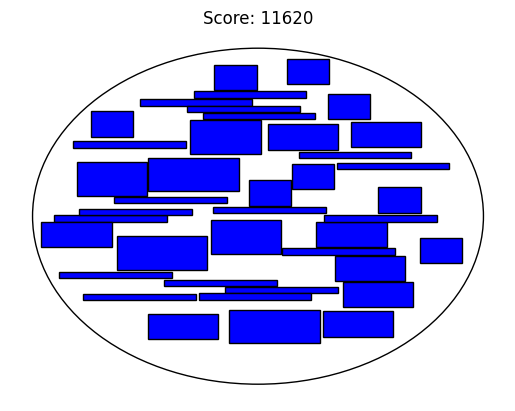

In [8]:
population = Population(800, df)

population.generate_population(10)
population.scores()
population.best_individual().plot()

<Axes: title={'center': 'Score: 11620'}>

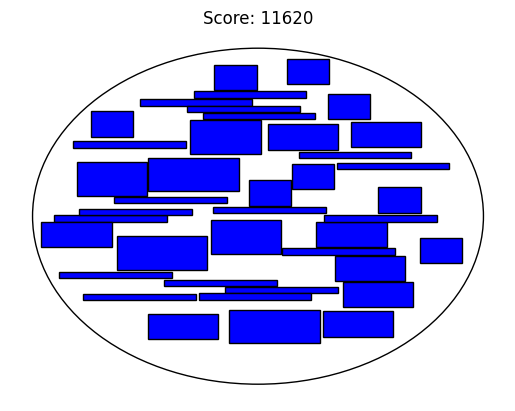

In [9]:
population.mutate(type=["move", "add"], how_many_rects_move=0.3, magnitude_move=0.001, collide_strategy="skip")

population.best_individual().plot()

<Axes: title={'center': 'Score: 15140'}>

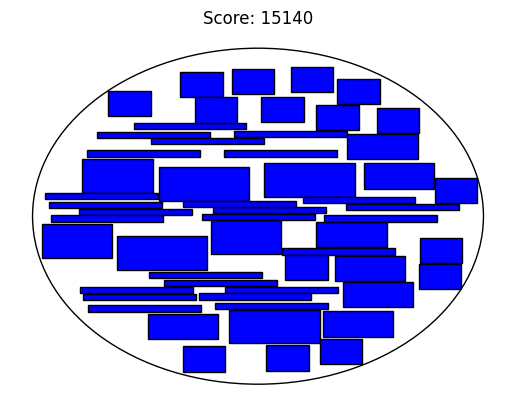

In [10]:
population.mutate(type=["move", "add"], how_many_rects_move=0.3, magnitude_move=0.001, collide_strategy="remove")
population.crossover()
population.best_individual().plot()

<Axes: title={'center': 'Score: 15140'}>

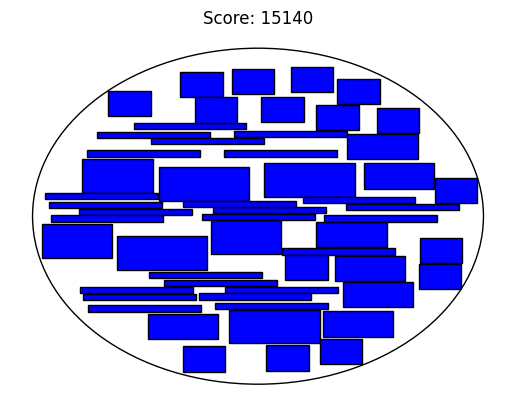

In [11]:
population.best_individual().plot()

## Evaluations
### Dataset 800

In [12]:
df = load_data("800")

In [13]:
population = Population(800, df, temperature=1000)
best_individual_scores, avg_individual_scores, times = population.run(n_generations=30, n_individuals=10, iterations=50, elite=0.1, type=["move", "add"], axis="both", how_many_rects_move=0.5, magnitude_move=1, collide_strategy="skip", add_new_rects=True, add_new_rects_iterations=10)

with open("../results/800/population10individuals.pkl", "wb") as f:
    pickle.dump(population, f)

Generation: 0
Best individual score in generation 0: 14500
Average individual score in generation 0: 13206.0
Generation time: 2.956366539001465
Generation: 1
Best individual score in generation 1: 18940
Average individual score in generation 1: 17348.0
Generation time: 3.2392120361328125
Generation: 2
Best individual score in generation 2: 20460
Average individual score in generation 2: 18552.0
Generation time: 3.7922682762145996
Generation: 3
Best individual score in generation 3: 20460
Average individual score in generation 3: 19628.0
Generation time: 3.9329473972320557
Generation: 4
Best individual score in generation 4: 20960
Average individual score in generation 4: 19870.0
Generation time: 5.086135387420654
Generation: 5
Best individual score in generation 5: 20960
Average individual score in generation 5: 19946.0
Generation time: 2.30163836479187
Generation: 6
Best individual score in generation 6: 21820
Average individual score in generation 6: 20792.0
Generation time: 6.039856

Text(0.5, 1.0, 'Scores over generations/nfor 30 generations and 10 individuals')

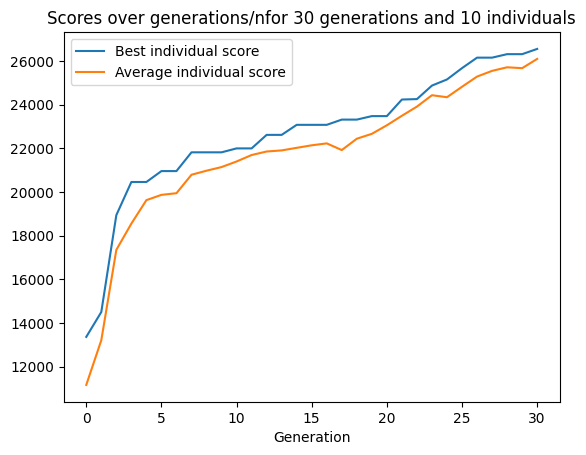

In [14]:

with open("../results/800/population10individuals.pkl", "rb") as f:
    population = pickle.load(f)

plt.plot(best_individual_scores, label="Best individual score")
plt.plot(avg_individual_scores, label="Average individual score")
plt.legend()
plt.xlabel("Generation")
plt.title("Scores over generations/nfor 30 generations and 10 individuals")

In [15]:
population = Population(800, df, temperature=1000)
best_individual_scores, avg_individual_scores, times = population.run(n_generations=30, n_individuals=30, iterations=50, elite=0.1, type=["move", "add"], axis="both", how_many_rects_move=0.5, magnitude_move=1, collide_strategy="skip", add_new_rects=True, add_new_rects_iterations=10)

with open("../results/800/population30individuals.pkl", "wb") as f:
    pickle.dump(population, f)
    

Generation: 0
Best individual score in generation 0: 15080
Average individual score in generation 0: 13487.333333333334
Generation time: 9.8400239944458
Generation: 1
Best individual score in generation 1: 17120
Average individual score in generation 1: 15322.0
Generation time: 10.79854965209961
Generation: 2
Best individual score in generation 2: 18020
Average individual score in generation 2: 16420.666666666668
Generation time: 12.328269243240356
Generation: 3
Best individual score in generation 3: 18560
Average individual score in generation 3: 16859.333333333332
Generation time: 10.727418899536133
Generation: 4
Best individual score in generation 4: 19500
Average individual score in generation 4: 17582.666666666668
Generation time: 10.945910930633545
Generation: 5
Best individual score in generation 5: 19940
Average individual score in generation 5: 18422.0
Generation time: 10.960865497589111
Generation: 6
Best individual score in generation 6: 21000
Average individual score in gen

Text(0.5, 1.0, 'Scores over generations for 30 generations and 30 individuals')

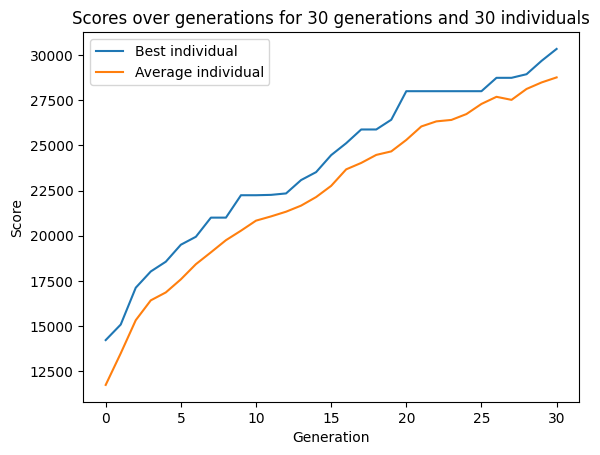

In [16]:

with open("../results/800/population30individuals.pkl", "rb") as f:
    population = pickle.load(f)

plt.plot(best_individual_scores, label="Best individual")
plt.plot(avg_individual_scores, label="Average individual")
plt.ylabel("Score")
plt.xlabel("Generation")
plt.legend()
plt.title("Scores over generations for 30 generations and 30 individuals")

### dataset 850

In [17]:
data = load_data("850")

In [18]:
population = Population(850, df, temperature=1000)
best_individual_scores, avg_individual_scores, times = population.run(n_generations=30, n_individuals=30, iterations=50, elite=0.1, type=["move", "add"], axis="both", how_many_rects_move=0.5, magnitude_move=1, collide_strategy="skip", add_new_rects=True, add_new_rects_iterations=10)

with open("../results/850/population30individuals.pkl", "wb") as f:
    pickle.dump(population, f)
    

Generation: 0
Best individual score in generation 0: 18080
Average individual score in generation 0: 14615.333333333334
Generation time: 5.472066640853882
Generation: 1
Best individual score in generation 1: 19980
Average individual score in generation 1: 16460.0
Generation time: 6.903483867645264
Generation: 2
Best individual score in generation 2: 21580
Average individual score in generation 2: 18930.0
Generation time: 6.9385809898376465
Generation: 3
Best individual score in generation 3: 22800
Average individual score in generation 3: 20351.333333333332
Generation time: 11.155208587646484
Generation: 4
Best individual score in generation 4: 22800
Average individual score in generation 4: 20948.666666666668
Generation time: 9.638731718063354
Generation: 5
Best individual score in generation 5: 23660
Average individual score in generation 5: 21942.666666666668
Generation time: 9.315574169158936
Generation: 6
Best individual score in generation 6: 25280
Average individual score in gen

Text(0.5, 1.0, 'Scores over generations for 30 generations and 30 individuals dataset 850')

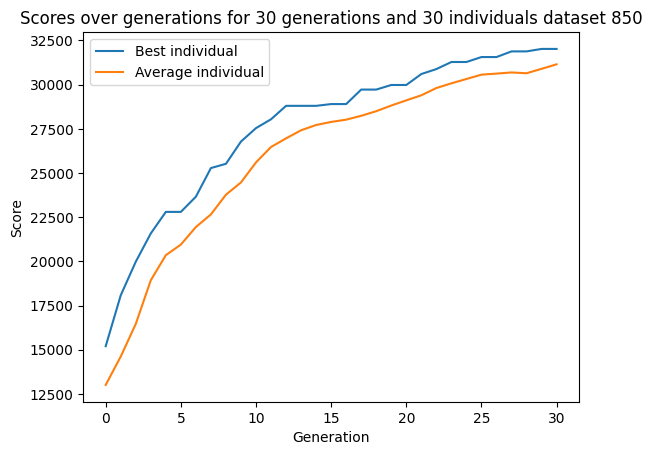

In [19]:

with open("../results/850/population30individuals.pkl", "rb") as f:
    population = pickle.load(f)

plt.plot(best_individual_scores, label="Best individual")
plt.plot(avg_individual_scores, label="Average individual")
plt.ylabel("Score")
plt.xlabel("Generation")
plt.legend()
plt.title("Scores over generations for 30 generations and 30 individuals dataset 850")

### dataset 1000

In [21]:
data = load_data("1000")
population = Population(1000, df, temperature=1000)
best_individual_scores, avg_individual_scores, times = population.run(n_generations=30, n_individuals=30, iterations=50, elite=0.1, type=["move", "add"], axis="both", how_many_rects_move=0.5, magnitude_move=1, collide_strategy="skip", add_new_rects=True, add_new_rects_iterations=10)

with open("../results/1000/population30ind.pkl", "wb") as f:
    pickle.dump(population, f)

Generation: 0
Best individual score in generation 0: 19260
Average individual score in generation 0: 17589.333333333332
Generation time: 1.536747694015503
Generation: 1
Best individual score in generation 1: 23500
Average individual score in generation 1: 21308.0
Generation time: 2.8351991176605225
Generation: 2
Best individual score in generation 2: 26500
Average individual score in generation 2: 24999.333333333332
Generation time: 4.7335944175720215
Generation: 3
Best individual score in generation 3: 29320
Average individual score in generation 3: 26267.333333333332
Generation time: 7.8758909702301025
Generation: 4
Best individual score in generation 4: 30760
Average individual score in generation 4: 28143.333333333332
Generation time: 12.508771657943726
Generation: 5
Best individual score in generation 5: 32840
Average individual score in generation 5: 29962.0
Generation time: 12.026435613632202
Generation: 6
Best individual score in generation 6: 32840
Average individual score in 

Text(0.5, 1.0, 'Scores over generations for 30 generations and 30 individuals dataset 1000')

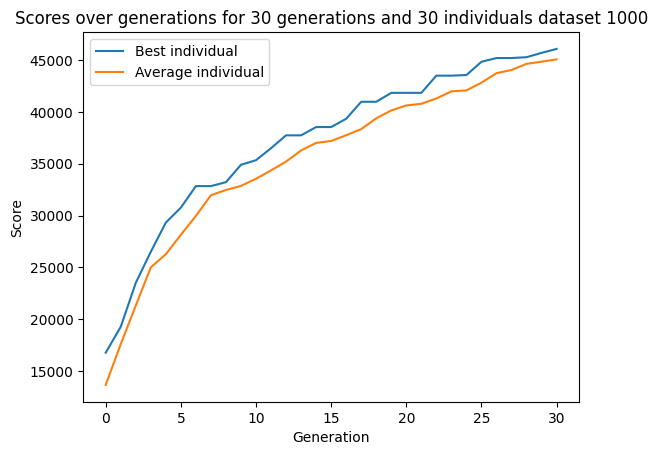

In [23]:

with open("../results/1000/population30ind.pkl", "rb") as f:
    population = pickle.load(f)

plt.plot(best_individual_scores, label="Best individual")
plt.plot(avg_individual_scores, label="Average individual")
plt.ylabel("Score")
plt.xlabel("Generation")
plt.legend()
plt.title("Scores over generations for 30 generations and 30 individuals dataset 1000")

## 1100

In [26]:
data = load_data("1100")

population = Population(1100, data, temperature=1000)

best_individual_scores, avg_individual_scores, times = population.run(n_generations=30, n_individuals=30, iterations=50, elite=0.1, type=["move", "add"], axis="both", how_many_rects_move=0.5, magnitude_move=1, collide_strategy="skip", add_new_rects=True, add_new_rects_iterations=10)

with open("../results/1100/population30ind.pkl", "wb") as f:
    pickle.dump(population, f)

Generation: 0
Best individual score in generation 0: 12640
Average individual score in generation 0: 11837.333333333334
Generation time: 1.6187615394592285
Generation: 1
Best individual score in generation 1: 14280
Average individual score in generation 1: 12630.666666666666
Generation time: 2.2624430656433105
Generation: 2
Best individual score in generation 2: 14360
Average individual score in generation 2: 13759.333333333334
Generation time: 3.0597310066223145
Generation: 3
Best individual score in generation 3: 15460
Average individual score in generation 3: 13906.666666666666
Generation time: 4.415554523468018
Generation: 4
Best individual score in generation 4: 15940
Average individual score in generation 4: 14584.666666666666
Generation time: 5.293386459350586
Generation: 5
Best individual score in generation 5: 16900
Average individual score in generation 5: 14959.333333333334
Generation time: 7.549186706542969
Generation: 6
Best individual score in generation 6: 16900
Average 

Text(0.5, 1.0, 'Scores over generations for 30 generations and 30 individuals dataset 1100')

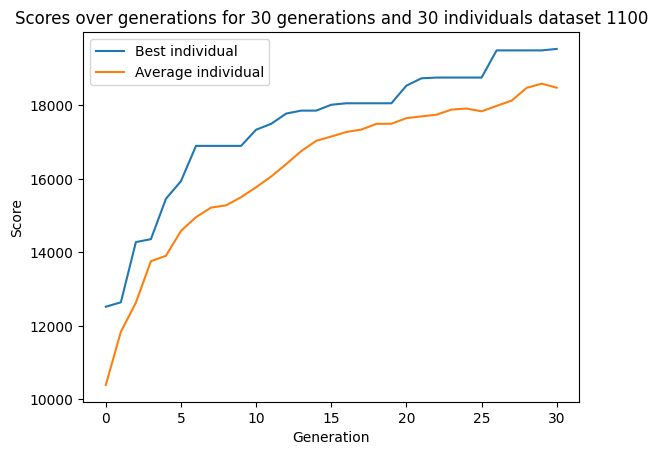

In [27]:

with open("../results/1100/population30ind.pkl", "rb") as f:
    population = pickle.load(f)

plt.plot(best_individual_scores, label="Best individual")
plt.plot(avg_individual_scores, label="Average individual")
plt.ylabel("Score")
plt.xlabel("Generation")
plt.legend()
plt.title("Scores over generations for 30 generations and 30 individuals dataset 1100")

# 1200

In [28]:
data = load_data("1200")

population = Population(1200, data, temperature=1000)

best_individual_scores, avg_individual_scores, times = population.run(n_generations=30, n_individuals=30, iterations=50, elite=0.1, type=["move", "add"], axis="both", how_many_rects_move=0.5, magnitude_move=1, collide_strategy="skip", add_new_rects=True, add_new_rects_iterations=10)

with open("../results/1200/population30ind.pkl", "wb") as f:
    pickle.dump(population, f)

Generation: 0
Best individual score in generation 0: 15320
Average individual score in generation 0: 13623.333333333334
Generation time: 0.2543818950653076
Generation: 1
Best individual score in generation 1: 16200
Average individual score in generation 1: 14954.0
Generation time: 0.433910608291626
Generation: 2
Best individual score in generation 2: 17760
Average individual score in generation 2: 15916.0
Generation time: 0.7374989986419678
Generation: 3
Best individual score in generation 3: 18800
Average individual score in generation 3: 16823.333333333332
Generation time: 1.0427899360656738
Generation: 4
Best individual score in generation 4: 19340
Average individual score in generation 4: 17424.0
Generation time: 1.4193847179412842
Generation: 5
Best individual score in generation 5: 19360
Average individual score in generation 5: 17624.666666666668
Generation time: 2.009599447250366
Generation: 6
Best individual score in generation 6: 19360
Average individual score in generation 6

Text(0.5, 1.0, 'Scores over generations for 30 generations and 30 individuals dataset 1200')

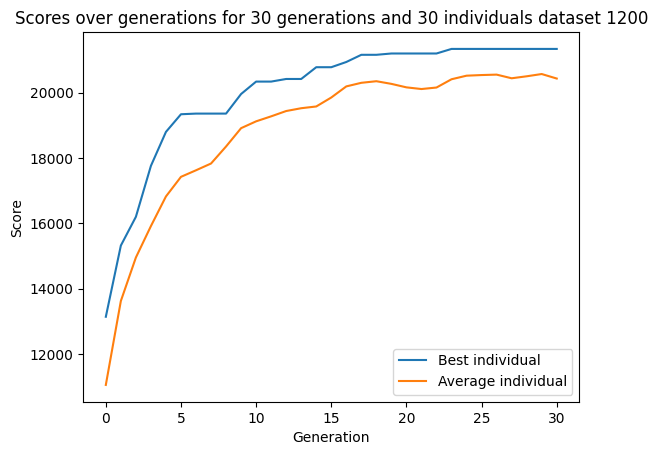

In [29]:

with open("../results/1200/population30ind.pkl", "rb") as f:
    population = pickle.load(f)

plt.plot(best_individual_scores, label="Best individual")
plt.plot(avg_individual_scores, label="Average individual")
plt.ylabel("Score")
plt.xlabel("Generation")
plt.legend()
plt.title("Scores over generations for 30 generations and 30 individuals dataset 1200")